<html>
    <summary></summary>
    <p float="left">
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;">
              <h1>
               <left>Linear Algebra in Python </left>
              </h1>
              <p><left>============================================================================</left> </p>              
             <pre>Course: BIOM/CBE 480A5, Spring 2025
Instructor: Dr. Brian Munsky
Contact Info: munsky@colostate.edu
Authors: Will Raymond, Dr. Luis Aguilera, Dr. Brian Munsky
</pre>
         </div>
    </p>

</html>



<details>
  <summary>Copyright info</summary>

```
Copyright 2023 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>

# **Learning Objectives**

In this notebook, we will begin a fast review of linear algebra, while focussing on several tools in NumPy that we will use again and again in this course.  Upon completing this lesson, students will achieve learning objectives to create and solve ```Linear equations``` and to manipulate different types of ```Arrays``` (i.e., vectors, matrices, and tensors). Specifically, when you complete this notebook, you will be able to 

* Describe the meaning of ```linear equations``` and be able to write them in the form of ```matrices``` and ```vectors```.
* Use ```NumPy``` in Python to create different NumPy ```ndarrays``` to represent vectors, matrices, and tensors.
* Manipulate NumPy ndarrays using different techniques for ```indexing```, ```reshaping```, ```broadcasting``` and ```reduction``` to focus in on important quantities or perform important calculations.
* Solve sets of coupled ```linear equations``` in NumPy.
* Recognize and formulate linear equations in augmented matrix form.
* Define and test for ```linear independence```.

# **1. Linear Equations**

A **Linear Equation** is an equation that describes a "straight-line" relationship between any two variables.  For example:
 $$ y = ax + b$$
describes a linear relationship between the variables $x\in \mathbb{R}$ and $y\in \mathbb{R}$.  

Here, we use the notation $\mathbb{R}$ to denote the set of real numbers.  The variables $a$ and $b$ are the parameters of the equation.  The parameter $a$ is describes the ```slope``` of the line for how $y$ changes with respect to $x$ and the parameter $b$ is the ```bias``` or the ```y-intercept``` of the line (i.e., the value of $y$ when $x$ is equal to zero). Let's see what this might look like.

Before we can work with these equations, we need to load some functions by running the next cell.

In [4]:
# First, lets import numpy and matplot lib and set some options for plotting.
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import importlib
# add the path ../BIOM480A5 to the system path
try:
    os.listdir(os.path.abspath('../BIOM480A5'))
    BIOM480A5_path = os.path.abspath('../BIOM480A5')
except:
    os.listdir(os.path.abspath('BIOM480A5'))
    BIOM480A5_path = os.path.abspath('BIOM480A5')
sys.path.append(BIOM480A5_path)
import BIOM480A5_Quizzes

# Plotting style - here we set some options for plotting later in this notebook.
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib.cm as cm
from matplotlib.lines import Line2D
colors = ['#ef476f', '#06d6a0','#7400b8','#073b4c', '#118ab2',]
#colors = ['#fa8174', '#b3de69', '#bc82bd','#ccebc4','#ffed6f','#81b1d2']
font = {'family' : 'monospace',
    'weight' : 'bold',
    'size'   : 12}
plt.rcParams.update({'font.size': 12, 'font.weight':'bold', 'font.family':'monospace'  }   )
plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
plt.rcParams.update({'xtick.major.width'   : 2.8 })
plt.rcParams.update({'xtick.labelsize'   : 12 })
plt.rcParams.update({'ytick.major.width'   : 2.8 })
plt.rcParams.update({'ytick.labelsize'   : 12})
plt.rcParams.update({'axes.titleweight'   : 'bold'})
plt.rcParams.update({'axes.titlesize'   : 10})
plt.rcParams.update({'axes.labelweight'   : 'bold'})
plt.rcParams.update({'axes.labelsize'   : 12})
plt.rcParams.update({'axes.linewidth':2.8})
plt.rcParams.update({'axes.labelpad':8})
plt.rcParams.update({'axes.titlepad':10})  

### **1.A. Plotting the line corrsponding to a linear equation in Python**

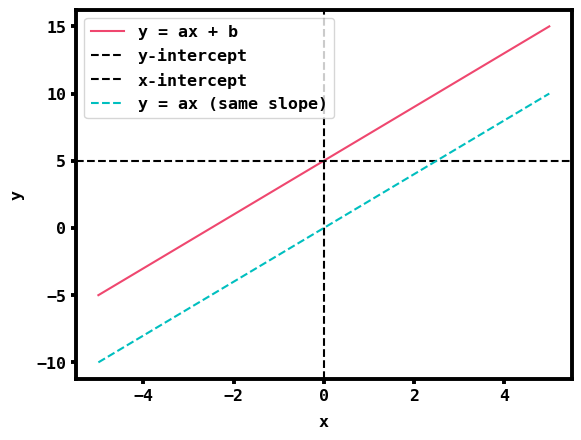

In [20]:
# Now to make a plot of our line.
# # make a numpy array x with 100 values from -5 to 5
x = np.linspace(-5, 5, 100)
a = 2
b = 5

# make a numpy array y that is the line a*x + 1
y = a * x + b

# plot y vs. x
plt.plot(x, y)
# label the x and y axes
plt.xlabel('x')
plt.ylabel('y')

# draw a horizontal dashed line at y=b and a vertical dashed line at x=0 to demonstrate the intercepts.
plt.axhline(y=b, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

# draw a diagonal dashed line through the origin to demonstrate the slope.
plt.plot(x, a*x, linestyle='--', color='c')

# add a legend
plt.legend(['y = ax + b', 'y-intercept', 'x-intercept', 'y = ax (same slope)'])



## **1.B. Multiple Linear Equations**
In the previous example, we had a single linear equation with a single independent variable, $x\in \mathbb{R}$ and a single dependent variable, $y\in \mathbb{R}$. More generally, we can describe a set of many linear equations, where the input is a vector $x\in \mathbb{R}^n$ and the output is a vector $y\in \mathbb{R}^m$, and we can write the system of equations in matrix form as $$\mathbf{y} = \mathbf{Ax} + \mathbf{b},$$ where $\mathbf{b}\in \mathbb{R}^{m\times 1}$ is the ```bias``` vector (i.e., the values of $\mathbf{y}$ when all values of $\mathbf{x}$ are zero) and $\mathbf{A}\in \mathbb{R}^{m\times n}$ is the ```matrix of coefficients``` that maps changes in the input vector $\mathbf{x}$ (relative to zero) to corresponding changes in the output vector $\mathbf{y}$ (relative to $\mathbf{b})$.

### Other Ways or Writing Linear Equations
The matrix form shown here is equivalent to writing $m$ different equations, such as:
$$\begin{matrix} 
y_1 = a_{11}x_1 + \ldots + a_{1n}x_n + b_1\\
y_2 = a_{21}x_1 + \ldots + a_{2n}x_n + b_2\\
\vdots\\
y_m = a_{m1}x_1 + \ldots + a_{mn}x_n + b_m,
\end{matrix}
$$
where 

$$\mathbf{x} = 
\left[\begin{matrix} 
x_1\\
x_2\\
\vdots\\
x_{n}
\end{matrix}\right],\ 
 \mathbf{y} = 
\left[\begin{matrix} 
y_1\\
y_2\\
\vdots\\
y_{m}
\end{matrix}\right],\ 
 \mathbf{b} = 
\left[\begin{matrix} 
b_1\\
b_2\\
\vdots\\
b_{m}
\end{matrix}\right],\ \text{and }
\mathbf{A} = 
\left[\begin{matrix} 
a_{11}&a_{12}& \ldots &a_{1n}\\ 
a_{21}&a_{22}&\ldots &a_{2n}\\ 
\ldots &\ldots &\ldots &\ldots\\
a_{m1}&a_{m2}&\ldots &a_{mn}
 \end{matrix}\right]
$$

In additon to the matrix and individual equation forms, there are also other common ways to describe these equations:

In **column form**, we write:
$${\mathbf{y}}  = 
\sum_{j=1}^n 
\mathbf{A}_j x_j,$$
where $\mathbf{A}_j$ represent the different columns of the matrix $\mathbf{A}$ (e.g., $\mathbf{A} = 
\left[\begin{matrix} 
\mathbf{A}_1 & \mathbf{A}_2 &\ldots &\mathbf{A}_n \end{matrix}\right]$
)

In **row form**, we write: 
$${\mathbf{y}}  = 
\left[\begin{matrix}
\tilde{\mathbf{A}}_1 \mathbf{x}\\
\tilde{\mathbf{A}}_2 \mathbf{x}\\
\vdots\\
\tilde{\mathbf{A}}_m \mathbf{x}
\end{matrix}\right],\text{ where } {\mathbf{A}}  = 
\left[\begin{matrix}
\tilde{\mathbf{A}}_1\\
\tilde{\mathbf{A}}_2 \\
\vdots\\
\tilde{\mathbf{A}}_m
\end{matrix}\right],$$
and $\tilde{\mathbf{A}}_i$ represents the $i^{\rm th}$ row of the matrix $\mathbf{A}$.

For the rest of this notebook, we are going to be working with these kinds of equations, but first we need to introduce some useful python tools.

# **2. Basic NumPy**

<html>
<summary></summary>
<p float="left">
<img align="left" src="https://numpy.org/images/logo.svg" width="150" height="150">
</p>
</html>

In this notebook, we are going to work with linear equations, like those defined above.  And to help us in that process, we are going to use one of the most widely used data manipulation packages within Python, ```Numpy```!

```numpy``` and ```scipy``` are ubiquitous in the world of scientific computing in Python. ```NumPy```, short for Numeric Python, is a library provides access to a lot of generalized array functions for linear algebra or manipulation that is not available with the standard list typing in Python. In addition to providing its powerful ```ndarray``` type, ```numpy``` also includes a myriad of packages for random simulation, basic statistics, sorting, and various matrix transforms. 

The core of numpy is the array, ```ndarray```, so let's take a look at that first. 

------

You can also read more about these operations in the textbook:
```Reading: Kinder, Nelson Section 2```

## **2.A.  Making your first array**

There are multiple ways of making an array, but one of the easiest is to first generate a list or list of lists, or even a list of lists of lists, and then pass this to ```np.array``` .

Let's try it.

In [21]:
# Let's start witha simple numpy array corresponding to an n-dimensional vector (like 'x' in the introduction).
my_list = [0,1,2,3,4]
my_np_array = np.array(my_list)

print(my_np_array)

[0 1 2 3 4]


## **2.B. Overview of Methods for ndarrays**

Recall that python objects can have lots of methods or functions that can operate on the object data.  Let's look what at what is avaialble in numpy's ```ndarray```.

In [22]:
#Now that we have this ndarray, let's compare its methods to those of lists that we saw in a previous module.
print('The callable functions of np_arrays are:')
print([f for f in dir(my_np_array) if not f.startswith("_")])
print('The callable functions of lists are:')
print([f for f in dir(my_list) if not f.startswith("_")])

The callable functions of np_arrays are:
['T', 'all', 'any', 'argmax', 'argmin', 'argpartition', 'argsort', 'astype', 'base', 'byteswap', 'choose', 'clip', 'compress', 'conj', 'conjugate', 'copy', 'ctypes', 'cumprod', 'cumsum', 'data', 'diagonal', 'dot', 'dtype', 'dump', 'dumps', 'fill', 'flags', 'flat', 'flatten', 'getfield', 'imag', 'item', 'itemset', 'itemsize', 'max', 'mean', 'min', 'nbytes', 'ndim', 'newbyteorder', 'nonzero', 'partition', 'prod', 'ptp', 'put', 'ravel', 'real', 'repeat', 'reshape', 'resize', 'round', 'searchsorted', 'setfield', 'setflags', 'shape', 'size', 'sort', 'squeeze', 'std', 'strides', 'sum', 'swapaxes', 'take', 'tobytes', 'tofile', 'tolist', 'tostring', 'trace', 'transpose', 'var', 'view']
The callable functions of lists are:
['append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']



Numpy arrays have way more functions associated with them than a regular list! Let's take a look at some of the more commonly used ones:

Now that we have an array in memory, we can call functons to look at of it features. 

How big is it? What is its shape?  ```numpy``` has some useful methods to get information for all of these and many more.

Here's some common ones:

given ```arr = np.array([[0,1,2,3,4]])```

| Method    | Description  | Result
| ----------- | ----------- | ------------ |
| arr.shape   |  returns a tuple of the size of each dimensions | ```(1,5) ```   |
| arr.ndim | number of dimensions |```2 ```   |
| arr.dtype   |  the datatype of the info inside the array | ```dtype('int64') ```    
| arr.size | integer total entries of this array | ```5```  |  
| arr.nbytes | the number of bytes in RAM consumed by storing only the information inside the array | ``` 40 ```|

Let's try them out on our ndarray.

In [23]:
# Let's start with a simple numpy array corresponding to an n-dimensional vector (like 'x' in the introduction).
arr = np.array([[0,1,2,3,4]])

# Here are some descriptions of the attributes of the array arranged in a dictionary with the attribute as the key,
# and a description of the attribute as the value.
desc = {'shape': '',
    'ndim': 'dimensions',
    'dtype': '',
    'size': 'elements',
    'nbytes':'bytes'}

# And here are the results of the methods of the array arranged in a dictionary with the method as the key,
# and the result of the method as the value.
arr_methods = {'shape': arr.shape,
    'ndim':arr.ndim,
    'dtype':arr.dtype,
    'size':arr.size,
    'nbytes':arr.nbytes}

# Now, let's run a loop to print out the results of the methods of the array.
for x in ["shape", "ndim", "dtype","size","nbytes"]:
    dropdown = x

    print('The %s of the array is %s %s' % (dropdown, str(arr_methods[dropdown]), desc[dropdown] ))



The shape of the array is (1, 5) 
The ndim of the array is 2 dimensions
The dtype of the array is int64 
The size of the array is 5 elements
The nbytes of the array is 40 bytes


Try to adde a few more methods to the dictionaries above.  You can find a list of methods here:
 https://numpy.org/doc/stable/reference/arrays.ndarray.html#array-methods

## **2.C.  Array allocation methods**

```numpy``` also has some nice methods to preallocate arrays of any size or shape you wish, that you can then fill later with some values.

| Method    | Description  | Examples  | Result
| ----------- | ----------- | ------------ | ------------ |
| np.zeros([n1,n2...]) |  Returns an ndim array of zeros  | ```np.zeros([10,10,10]) ```   | a (10 x 10 x 10) 3d array of zeros
| np.ones([n1,n2...]) | Returns an ndim array of ones  |```np.ones([3,5]) ```   | a (3 x 5) 2d array of ones |
| np.array([n1,n2...]) | converts an iterable to an array | ``np.array([1,2,3])``  |  a 1d array of [1,2,3] |
| np.empty([n1,n2...]) | an empty ndim array | ``` np.empty([3,3]) ```| a (3 x 3) empty array - note values will be from whatever memory it allocated.

Specific cases for easily allocating ranges/identity matrix

| Method    | Description  | Examples  
| ----------- | ----------- | ------------ |
| np.linspace(start, stop, n_steps) | returns a linearly spaced array from start to stop with n_steps | ```np.linspace(0,10,11) ```  |  
| np.logspace(start, stop, n_steps) | returns a linearly spaced array from 10^start to 10^stop with n_step | ``` np.logspace(0,10,11)```|
| np.arange(stop,) | returns a linearly spaced array from a given start or 0 to stop with integer steps (or optional step sizes) | ``` np.logspace(0,10,11)```|
| np.eye(N)   | gives a 2d identify matrix of NxN|  ```np.eye(3) ```   | a (3 x 3) identity matrix (diagonals are 1)

Let's try some of these out.

In [24]:
# Here are some common 3x3 arrays.
print(f'np.zeros([3,3]) makes an array of zeros:\n {np.zeros([3,3])}')
print(f'np.ones([3,3]) makes an array of ones:\n {np.ones([3,3])}')
print(f'np.eye(3) makes an identity matrix:\n {np.eye(3)}')
print(f'np.random.rand(3,3) makes a random array:\n {np.random.rand(3,3)}')


np.zeros([3,3]) makes an array of zeros:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
np.ones([3,3]) makes an array of ones:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
np.eye(3) makes an identity matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
np.random.rand(3,3) makes a random array:
 [[0.34969758 0.4269562  0.05904164]
 [0.35773176 0.94272577 0.08444781]
 [0.21313348 0.2542375  0.99155888]]


In [25]:
# Here is a way to make a 3x3 array using a list of lists.
list_of_lists = [ [y for y in range(3*x,3*x+3)] for x in range(0,3)]
print('np.array() of a list of lists')
print(np.array(list_of_lists ))

np.array() of a list of lists
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [27]:
# Here is a way to make an an orderred array using linspace:
start = 3.5
stop = 14
n_steps = 49

print('np.linspace(start, stop, n_steps):')
print(np.linspace(start, stop, n_steps))

# We can also do it in logarithmic space:
print('\nnp.logspace(log10(start), log10(stop), n_steps -- in logspace):')
print(np.logspace(np.log10(start), np.log10(stop), n_steps))

# We can also do it in integer space starting at 0 using the np.arange() function:
print('\nnp.arange(stop):')
print(np.arange(stop))

# We can also do it in integer space starting at `start' using the np.arange() function:
print('\nnp.arange(start, stop):')
print(np.arange(start, stop))

np.linspace(start, stop, n_steps):
[ 3.5      3.71875  3.9375   4.15625  4.375    4.59375  4.8125   5.03125
  5.25     5.46875  5.6875   5.90625  6.125    6.34375  6.5625   6.78125
  7.       7.21875  7.4375   7.65625  7.875    8.09375  8.3125   8.53125
  8.75     8.96875  9.1875   9.40625  9.625    9.84375 10.0625  10.28125
 10.5     10.71875 10.9375  11.15625 11.375   11.59375 11.8125  12.03125
 12.25    12.46875 12.6875  12.90625 13.125   13.34375 13.5625  13.78125
 14.     ]

np.logspace(log10(start), log10(stop), n_steps -- in logspace):
[ 3.5         3.60255783  3.70812083  3.81677706  3.92861717  4.04373444
  4.1622249   4.2841874   4.40972367  4.53893844  4.67193949  4.80883777
  4.94974747  5.09478614  5.24407477  5.39773789  5.55590368  5.71870409
  5.88627491  6.05875593  6.23629103  6.4190283   6.60712019  6.80072359
  7.          7.20511566  7.41624166  7.63355413  7.85723434  8.08746888
  8.32444981  8.5683748   8.81944735  9.07787688  9.34387898  9.61767553
  9.89949494 

***Note that when you use ```np.arrange```, the start can be a float, and the stop is not included in the array.*** 

### **Practice your understanding for numpy arrays**

Complete the following quiz to practice your understanding of ```numpy``` arrays.

In [28]:
importlib.reload(BIOM480A5_Quizzes)
from BIOM480A5_Quizzes import multiple_choice_quiz
multiple_choice_quiz('numpy_arrays')

Which command would you use to perform the following numpy operations:
 create a vector of 10 numbers from 1 to 10 in reverse order ?
0: X.shape
1: X[:5,:]
2: X = np.ones((3,4))
3: X = np.arange(10,0,-1)
4: X = np.zeros((3,4))
5: X[:,:5]
Please enter a number between 0 and 5.
Please enter a number between 0 and 5.
You answered 10 questions correctly. Goodbye!


## **2.D.  Array Manipulation using Slicing and Indexing**

Just like we previously saw for lists, we will need to know how to ```index``` and ```slice``` numpy arrays. In addition to these, we will want to apply more mathematical operations known as ```broadcasting``` and ```reduction```.

Each dimension in a ```numpy``` array can be sliced or indexed just like we did previousy for python list:

**array[ row, column, ...., n ]**

For example, consider this array:

```
arr = np.array([[1,2,3], \
                [4,5,6], \
                [7,8,9]])
```

| Example    | Description  | Result  
| ----------- | ----------- | ------------ |
| arr[0] | row 0 | ``` [1,2,3] ```  |  
| arr[0,0]| element in row 0, column 0 | ``` [1]```|
| arr[:,0]| column 0 | ``` [1,4,7]```|
| arr[0:2,0:2]| top left block of size 2 x 2 | ``` array([[1,2],[4,5]])```|
| arr[::-1]| reverses the rows | ```[[7,8,9],[4,5,6],[1,2,3]] ```|
| arr[::-1, ::-1]| reverses the rows AND columns | ```[[9,8,7],[6,5,4],[3,2,1]] ```|


### **2.D.1. Indexing Arrays using Logicals**

```numpy``` arrays will accept ```logical indexing``` or any indexing as long as the shape and maximum indices make sense for the original matrix.

```Logical indexing```, also known as ```boolean indexing```, is a technique in Python (and other programming languages) used to select elements from an array or a sequence based on a condition. This condition is typically represented as a boolean array, where ```True``` indicates that the corresponding element should be selected, and ```False``` indicates that it should not.  In python, you can apply logical indexing to any or all of the dimensions of the original nparray.

| Example    | Description  | Result  
| ----------- | ----------- | ------------ |
| arr[arr > 5 ]| returns all elements greater than 5| ```array([6, 7, 8, 9]) ```|  
| arr[1][arr[1] > 5 ]| returns all elements in row 1 greater than 5| ```array([6]) ```|  

In the first example, the indexing is over the whole matrix, and only the elements that satisfy the conditioons are returned. In the second example, the first row is selected first, and then logical indexing is only over the entries in that row.

### **2.D.2. Other common manipulation methods:**

| Method    | Description  | Examples  
| ----------- | ----------- | ------------ |
| arr.reshape() | will resize an array, the new size must have the same amount of elements!| ```arr.resize(1,9)```  |  
| arr.T | transposes the array | ``` arr.T```|
| np.expand_dims(array, axis) | adds an axis to a given array| ``` np.expand_dims(arr,axis=0)```|
| arr.flatten()   | flattens an array to 1 dimension |  ```arr.flatten()```   |
| np.diag(array,offset)   | gets the diagonal of an array based on offset from middle diag |  ```np.diag(arr,0)```   |
| np.where(statement)   | returns indexes matching the statement |  ```np.where(arr < 5)```   |
| np.at_least2d(arr)   | adds an axis to a 1d array if needed, leaves any ndim >= 2 alone|  ```np.atleast_2d(arr)```   |
| np.tile(iterable, N) | repeat an iterable object N times along an axis | ``` np.tile(arr, N)```|
| np.hstack(iterable of iterables) |Horizontally stack the arrays provided in an iterable (list of arrays) | ```np.hstack([arr1,arr2])``` |
| np.vstack(iterable of iterables) | Vertically stack the arrays provided in an iterable (list of arrays) | ```np.vstack([arr1,arr2])```|
| ___.astype(dtype) | convert a given array to a particular data type | ```np.array([1.2,1.4,1.5]).astype(int)```|
| ___.tolist() | convert a given array to a python list or lists of lists| ```np.array([1.2,1.4,1.5]).tolist()```|

In [5]:
# Let's try some of those out.
arr = np.array([[1,2,3], \
                [4,5,6], \
                [7,8,9]])
print('\nOriginal:')
print(arr)


Original:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [6]:
# reshaping the array
print('\nReshaped:')
print(arr.reshape(1,9))


Reshaped:
[[1 2 3 4 5 6 7 8 9]]


In [7]:
# flattening the array
print('\nFlattened:')
print(arr.flatten())


Flattened:
[1 2 3 4 5 6 7 8 9]


In [8]:
# transposing the array
print('\nTranspose:')
print(arr.T)


Transpose:
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [16]:
# Adding an extra dimension to the front of the array.
print('\nadd an extra dimension to the FRONT:')
print(np.expand_dims(arr, axis=0))

# Adding an extra dimension to the end of the array.
print('\nadd an extra dimension to the END:')
print(np.expand_dims(arr, axis=2))

# Adding an extra dimension to the middle of the array.
print('\nadd an extra dimension to the MIDDLE:')
print(np.expand_dims(arr, axis=1))

# Note that this increases the number of dimensions by one, but does not change the lenghts in the other dimensions.


add an extra dimension to the FRONT:
[[[1 2 3]
  [4 5 6]
  [7 8 9]]]

add an extra dimension to the END:
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]

 [[7]
  [8]
  [9]]]

add an extra dimension to the MIDDLE:
[[[1 2 3]]

 [[4 5 6]]

 [[7 8 9]]]


In [10]:
# Grab the middle diagonal of a rectangular array.
print('\nmiddle diagonal:')
print(np.diag(arr, 0))

# Grab the diagonal just above the middle diagonal of a rectangular array.
print('\nabove middle diagonal:')
print(np.diag(arr, 1))


middle diagonal:
[1 5 9]

above middle diagonal:
[2 6]


In [11]:
# Find which elements are less than 5 using the np.where() function.
print('\nindexes of array where the element is less than 5:')
row,col = np.where(arr < 5)
print(f'rows:    {row}')
print(f'columns: {col}')


indexes of array where the element is less than 5:
rows:    [0 0 0 1]
columns: [0 1 2 0]


In [12]:
# Change the data type to float64 (i.e, double precision floating point).
print('\nconvert the array to the floating point datatype')
print(arr.astype(np.float64))


convert the array to the floating point datatype
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [13]:
# Change the array into a list.
print('\nconvert the array to a python list')
print(arr.tolist())


convert the array to a python list
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


### **Quiz to practice some basic numpy array slizing and manipulation commands**

In [ ]:
importlib.reload(BIOM480A5_Quizzes)
from BIOM480A5_Quizzes import multiple_choice_quiz
multiple_choice_quiz('numpy_slicing')

### **2.D.3.  Addiitonal Practice Using Logical Indexing to Manipulate Arrays**
When procesing large amounts of data, we often want to perform the same task again and a gain to similar entries in a maxtrix or vector. Logical indexing is a fast and convenient way to accomplish such tasks.

Below is an example that is very relevant to image processing.  We will take a matrix and perform a saturation operation that sets any number over a specific threshold to that threshold.

In [31]:
# Example of applying a saturation function to a matrix.

#Let's start with a large matrix:
A = np.array([ [y for y in range(3*x,3*x+15)] for x in range(0,12)])
print(f'Our Original matrix is:\n {A}')

# We will construct a new matrix B that is saturated at a value 15.  
# That is, all numbers greater than 15 are set at 15.

# Because we do not want to change A itself, we will start by making a copy.
B = np.copy(A)

# Now we can apply our logic:
B[B>15]=15
print(f'\nOur saturated matrix is:\n {B}')

Our Original matrix is:
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
 [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
 [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
 [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32]
 [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
 [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
 [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
 [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]]

Our saturated matrix is:
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 3  4  5  6  7  8  9 10 11 12 13 14 15 15 15]
 [ 6  7  8  9 10 11 12 13 14 15 15 15 15 15 15]
 [ 9 10 11 12 13 14 15 15 15 15 15 15 15 15 15]
 [12 13 14 15 15 15 15 15 15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 

In [32]:
# Let's try another example, but this time we will reflect the values of the matrix about 0 and 15.

# This time, we want a matrix 'C' where all values are between 0 and 15, but
# when the numbers exceed those limits, we reflect their values (e.g., 17 which is 2 greater than 15
# becomes 13 which is two less than 15, or -6 which is 6 less than zero becomes 6).  For very large 
# or very small numbers, we may need to run multiple rounds of reflection, so we will use a while loop.
C = np.copy(A)
while (np.max(np.abs(C)))>15:
    C[C>15] = 30 - C[C>15]
    C[C<0] = -C[C<0]
print(f'\nOur reflected matrix is:\n {C}')


Our reflected matrix is:
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 3  4  5  6  7  8  9 10 11 12 13 14 15 14 13]
 [ 6  7  8  9 10 11 12 13 14 15 14 13 12 11 10]
 [ 9 10 11 12 13 14 15 14 13 12 11 10  9  8  7]
 [12 13 14 15 14 13 12 11 10  9  8  7  6  5  4]
 [15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]
 [12 11 10  9  8  7  6  5  4  3  2  1  0  1  2]
 [ 9  8  7  6  5  4  3  2  1  0  1  2  3  4  5]
 [ 6  5  4  3  2  1  0  1  2  3  4  5  6  7  8]
 [ 3  2  1  0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 3  4  5  6  7  8  9 10 11 12 13 14 15 14 13]]


## **2.E. Creating ndarrays using Broadcasting** 

```Broadcasting``` is a powerful feature in ```NumPy``` that allows operations on arrays of different shapes in a way that would otherwise require making copies of data. It enables element-wise operations without the need for explicit looping or reshaping.

**How Broadcasting Works**:
* *Alignment*: NumPy aligns the shapes of the arrays by adding dimensions of size 1 where necessary.
* *Replication*: NumPy replicates the smaller array along the newly added dimensions to match the shape of the larger array.
* *Element-wise Operation*: The operation is performed element-wise on the resulting arrays.

**Rules for Broadcasting**:
* *Compatibility*: Two dimensions are compatible when they are equal or one of them is 1.
* *Shape Alignment*: Starting from the trailing dimensions, NumPy compares the shapes and applies the broadcasting rules.

Let's try it out.

In [33]:
# Broadcasting example 1.
# We are going to start with a 5x1 array and a 1x3 array, and we will add them 
# together so that the new array is 5x3, and it will be the sum of the two arrays.
A = np.array([[1],[2],[3],[4],[5]])
B = np.array([[1,2,3]])

print(f'Our original arrays are:\n A = {A}\n B = {B}')
print(f'The broadcast sum of the two arrays is:\n {A+B}')

Our original arrays are:
 A = [[1]
 [2]
 [3]
 [4]
 [5]]
 B = [[1 2 3]]
The broadcast sum of the two arrays is:
 [[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]]


In [34]:
# Broadcasting example 2.
# We are going to start with a 5x3 array and a 1x3 array, and we will now take the
# maximum of the two arrays so that the new array is 5x3, and it will be the maximum
# of the two arrays.
A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])
B = np.array([[3,8,1]])

print(f'Our original arrays are:\n A = {A}\n B = {B}')
print(f'The broadcast maximum of the two arrays is:\n {np.maximum(A,B)}')

print('Notice that all the columns of the result are at least as big as the corresponding column of B')

Our original arrays are:
 A = [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]
 B = [[3 8 1]]
The broadcast maximum of the two arrays is:
 [[ 3  8  3]
 [ 4  8  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]
Notice that all the columns of the result are at least as big as the corresponding column of B


At some point in the course, you are going to encounter errors telling you that there is a problem broadcasting.  For example:

```ValueError: operands could not be broadcast together with shapes (3,) (2,)```

In [35]:
# Here is an example that gives a ValueError because the arrays are not compatible for broadcasting.
A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])
B = np.array([[3,8]])

print(f'The broadcast maximum of the two arrays is:\n {np.maximum(A,B)}')

ValueError: operands could not be broadcast together with shapes (5,3) (1,2) 

## **2.F. Reducing Arrays using Mathematical Operations**

Array ```reduction``` methods in Python, particularly in ```NumPy```, are used to perform operations that reduce the dimensions of an array by ```aggregating``` its elements. These methods typically operate along specified axes and include operations like ```summing```, ```finding``` the minimum or maximum, and computing the mean or other summary statistics. 

These reduction methods will essential for data analysis and manipulation, allowing you to summarize and aggregate data very efficiently. 

Please note that these operations can be applied to multi-dimensional arrays by specifying the axis along which the reduction should occur.

Here are some common array reduction methods:

In [14]:
# Illustration of common nparray reduction methods

# Let's start with a 3x3 array.
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

# Sum all the elements of the array.
print(f'The sum of all the elements of the array is {np.sum(A)}')

# Sum the elements of the array along the columns.
print(f'The sum of the elements of the array along the columns is {np.sum(A, axis=0)}')

# Sum the elements of the array along the rows.
print(f'The sum of the elements of the array along the rows is {np.sum(A, axis=1)}')

The sum of all the elements of the array is 45
The sum of the elements of the array along the columns is [12 15 18]
The sum of the elements of the array along the rows is [ 6 15 24]


In [37]:
# Find the minimum of all the elements of the array.
print(f'The minimum of all the elements of the array is {np.min(A)}')

# Find the minimum of the elements of the array along the columns.
print(f'The minimum of the elements of the array along the columns is {np.min(A, axis=0)}')

# Find the maximum of the elements of the array along the rows.
print(f'The maximum of the elements of the array along the rows is {np.max(A, axis=1)}')

The minimum of all the elements of the array is 1
The minimum of the elements of the array along the columns is [1 2 3]
The maximum of the elements of the array along the rows is [3 6 9]


In [38]:
# Find the product of all the elements of the array.
print(f'The product of all the elements of the array is {np.prod(A)}')

# Find the product of the elements of the array along the columns.
print(f'The product of the elements of the array along the columns is {np.prod(A, axis=0)}')

The product of all the elements of the array is 362880
The product of the elements of the array along the columns is [ 28  80 162]


In [39]:
# Find the mean of all the elements of the array.
print(f'The mean of all the elements of the array is {np.mean(A)}')

# Find the std of the elements of the array along the rows.
print(f'The standard deviation of the elements of the array along the rows is {np.std(A, axis=1)}')

The mean of all the elements of the array is 5.0
The standard deviation of the elements of the array along the rows is [0.81649658 0.81649658 0.81649658]


## **A Helpful Cheatsheet for Numpy Array Manipulations.**
As we wrap up this section on creating and manipulating ndarrays, here is a cheatsheet that shows a many of the tools and techniques we will have explored including ```index```, ```reshape```, ```broadcasting``` and ```reduce```  ndarrays.  You might find this to be a valuable resource.

[Numpy Documentation](https://numpy.org/doc/stable/user/whatisnumpy.html)


<img align="right" src = "https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-020-2649-2/MediaObjects/41586_2020_2649_Fig1_HTML.png?as=webp" >

## **Questions and practice**
Answer the following questions to solidify your understanding of this material. 
You should now also be able to answer questions Q6 - Q9 in Homework 2.

In [29]:
## Generate an array of all zeros of shape 3,3,3,3. Double check that the shape is that using
## the internal shape function. Convert this array to an integer array.

In [30]:
## Generate a 4x4 Identity matrix and then remove the final row.

In [31]:
## Repeat the following array vertically 5 times to end up with a 5x3 matrix
arr1 = np.array([[1,2,3]])

In [32]:
## transpose the following numpy array
arr2 = np.array([[1,2,3],
                 [4,5,6]])

In [33]:
## Use array logicals to return a flattened array of values greater than 0 in the following array
## Take the sum of all the negative values obtained from the logical operation.
arr3 = np.array([[-1, 2, 3, -31, -0.3 ],
                 [4, 0, 5, 39.3, -37,]])

In [34]:
## use np.where to find any indexes in the following array that is equal to zero
arr4 = np.array([[-1, 2, 3, -31, 0 ],
                 [4, 0, 5, 39.3,-37,],
                 [5, 4, 0, 0, 1] ])

In [35]:
## use np.sum with the correct axis=? argument to take the sum of the following array
## along each column

arr5 = np.array([[-1, 2, 3, -31, 13 ],
                 [14, 0, 5, 39.3,-37,],
                 [5, -3, 0, 0, 1] ])

# **3. Linear Algebra Calculations in Numpy**

Now that we know how to create and manipulate ndarrays, let's explore how to use them to actually solve some liear equations.

## **3.A.  Matrix Addition and Multiplication with Numpy**

NumPy provides a fast implementation of many linear algebra functions stored in ```np.linalg```.

```numpy``` arrays also can be treated as matrices for arithmetic operations!
Heres some examples of some basic arithmetic operations with two 2x2 matrices:

In [40]:
# Create a couple square matrices.
A = np.array([[1, 2],
              [3, 4]]) #matrix 1

B = np.array([[5, 6],
              [7, 8]]) #matrix 2
n = 5

# Now we can perform some operations on these matrices. To demonstrate this,
# let's create a dictionary of examples, where the key is the operation, and 
# the value is the result of the operation.
examples = {'matrix multiplication (inner product)': A @ B,
            'element-wise multiplication': A * B,
            'element-wise division': A/B,
            'scalar multiplication': n*A,
            'matrix subtraction': A - B,
            'matrix addition': A + B,
            'scalar addition': n + A,
            }
examples_str = {'matrix multiplication (inner product)': 'A @ B:',
                'element-wise multiplication': 'A * B:',
                'element-wise division': 'A / B',
            'scalar multiplication': 'n*A',
            'matrix subtraction': 'A - B:',
            'matrix addition': 'A + B:',
            'scalar addition': 'n + A',
            }

print(f'A:\n{A}\n')
print(f'B:\n{B}\n')

for dropdown in ["matrix multiplication (inner product)","element-wise multiplication",
                "element-wise division","scalar multiplication", "matrix subtraction",
                "matrix addition","scalar addition"]:

    print(f'The result of the {dropdown} operation ({examples_str[dropdown]}) is:\n')
    print(f'{examples[dropdown]}\n')

A:
[[1 2]
 [3 4]]

B:
[[5 6]
 [7 8]]

The result of the matrix multiplication (inner product) operation (A @ B:) is:

[[19 22]
 [43 50]]

The result of the element-wise multiplication operation (A * B:) is:

[[ 5 12]
 [21 32]]

The result of the element-wise division operation (A / B) is:

[[0.2        0.33333333]
 [0.42857143 0.5       ]]

The result of the scalar multiplication operation (n*A) is:

[[ 5 10]
 [15 20]]

The result of the matrix subtraction operation (A - B:) is:

[[-4 -4]
 [-4 -4]]

The result of the matrix addition operation (A + B:) is:

[[ 6  8]
 [10 12]]

The result of the scalar addition operation (n + A) is:

[[6 7]
 [8 9]]



**Please note that the standard matrix-matrix multiplication of [A] and [B] (i.e., the ```inner product```) is given by A@B!  This is very different than for Matlab!**

## **3.B. Solving Linear Equations**

In many engineering tasks, you will need to solve a system of ```linear equations``` represented by $\mathbf{Ax} = \mathbf{b}$, where ($\mathbf{A}$) is a matrix of coefficients, ($\mathbf{x}$) is a vector of unknowns, and ($\mathbf{b}$) is a vector of constants.

To accomplish this task, you can use various methods in Python, particularly with the help of NumPy. Here are some examples of methods to solve such equations:

In [41]:
# Solving linear equation using NumPy's numpy.linalg.solve Method
# Let's solve the following system of linear equations:
# 3x + 4y + 2z = 10
# 2x + 5y + 3z = 15
# x + y + z = 6

# We can represent this system of equations as a matrix equation Ax = b, where:
# A = [[3, 4, 2], [2, 5, 3], [1, 1, 1]]
# x = [[x], [y], [z]]
# b = [[10], [15], [6]]

# Let's define the matrix A and the vector b.
A = np.array([[3, 4, 2], [2, 5, 3], [1, 1, 1]])
b = np.array([10, 15, 6])

# Now, we can solve the system of linear equations using NumPy's numpy.linalg.solve method.
x = np.linalg.solve(A, b)

# The solution x represents the values of x, y, and z that satisfy the system of linear equations.
print(f'The solution to the system of linear equations is: x = {x[0]}, y = {x[1]}, z = {x[2]}')

# Let's verify the solution by substituting the values of x, y, and z back into the original equations.
x, y, z = x
eq1 = 3*x + 4*y + 2*z
eq2 = 2*x + 5*y + 3*z
eq3 = x + y + z

print(f'Verifying the solution:')
print(f'3x + 4y + 2z = {eq1} (should be 10)')
print(f'2x + 5y + 3z = {eq2} (should be 15)')
print(f'x + y + z = {eq3} (should be 6)')

# Notice how we defined all the variables in one line. This is called tuple unpacking.

The solution to the system of linear equations is: x = 0.5, y = -1.2500000000000004, z = 6.750000000000001
Verifying the solution:
3x + 4y + 2z = 10.0 (should be 10)
2x + 5y + 3z = 15.000000000000002 (should be 15)
x + y + z = 6.0 (should be 6)


**Handling Singular Matrices**:
If the matrix ($\mathbf{A})$ is singular (i.e., it does not have an inverse), then ```np.linalg.solve``` will raise a ```LinAlgError```.

In this case, there may be either **an infinite** number of exact solutions, or there are **no** exact solutions that will satisfy all equations at the same time. Let's see some examples:

In [43]:
# Example of least squares fitting using NumPy's numpy.linalg.lstsq Method
# Let's start wit the same system of linear equations as before:
# 3x + 4y + 2z = 10
# 2x + 5y + 3z = 15
# x + y + z = 6
# but this time, let's add two more equations:
# 4x + 3y + 5z = 20
# 5x + 6y + 4z = 25

# We can represent this system of equations as a matrix equation Ax = b, where:
# A2 = [[3, 4, 2], [2, 5, 3], [1, 1, 1], [4, 3, 5], [5, 6, 4]]
# x = [[x], [y], [z]]

# Let's define the matrix A and the vector b.
A2 = np.array([[3, 4, 2], [2, 5, 3], [1, 1, 1], [4, 3, 5], [5, 6, 4]])
b2 = np.array([10, 15, 6, 20, 25])

In [15]:
# Lets see what happens when we try to solve the system of equations using numpy.linalg.solve.
x2 = np.linalg.solve(A2, b2)

# We can see that we get a ValueError because the system of equations is overdetermined, meaning
# that there are more equations than unknowns. 

NameError: name 'A2' is not defined

In [45]:
# Now, although we cannot find an exact solutions, we can find a "best" solution for
#  the system of linear equations using NumPy's numpy.linalg.lstsq method.
x, residuals, rank, s = np.linalg.lstsq(A2, b2, rcond=None)

# The solution x represents the values of x, y, and z that minimize the sum of the 
# squared residuals.
print(f'The solution to the least squares problem is: x = {x}')

# Let's verify the solution by substituting the values of x, y, and z back into the original equations.
x, y, z = x
eq1 = 3*x + 4*y + 2*z
eq2 = 2*x + 5*y + 3*z
eq3 = x + y + z
eq4 = 4*x + 3*y + 5*z
eq5 = 5*x + 6*y + 4*z

print(f'Verifying the solution:')
print(f'3x + 4y + 2z = {eq1} (should be about 10)')
print(f'2x + 5y + 3z = {eq2} (should be about 15)')
print(f'x + y + z = {eq3} (should be about 6)')
print(f'4x + 3y + 5z = {eq4} (should be about 20)')
print(f'5x + 6y + 4z = {eq5} (should be about 25)')

# Total Squared Error
total_squared_error = residuals[0]
print(f'The total squared error is: {total_squared_error}')

The solution to the least squares problem is: x = [1.45255474 0.96715328 2.41970803]
Verifying the solution:
3x + 4y + 2z = 13.065693430656918 (should be about 10)
2x + 5y + 3z = 14.999999999999991 (should be about 15)
x + y + z = 4.839416058394155 (should be about 6)
4x + 3y + 5z = 20.81021897810217 (should be about 20)
5x + 6y + 4z = 22.744525547445228 (should be about 25)
The total squared error is: 16.489051094890563


In [46]:
# Example of a linear equation where the solution is not unique
# Let's consider the following system of linear equations:
# x + y + z = 6
# 2x + 2y + z = 12
# 3x + 3y + z = 18

# We can represent this system of equations as a matrix equation A3x = b3, where:
# A3 = [[1, 1, 1], [2, 2, 1], [3, 3, 1]]
# x = [[x], [y], [z]]

# Let's define the matrix A and the vector b.
A3 = np.array([[1, 1, 1], [2, 2, 1], [3, 3, 1]])
b3 = np.array([6, 12, 18])

In [47]:
# Let's try to solve the system of linear equations using NumPy's numpy.linalg.solve method.
x = np.linalg.solve(A3, b3)
print(f'The solution to the system of linear equations is: x = {x[0]}, y = {x[1]}, z = {x[2]}')

# in this case, the system of linear equations does not have a unique solution because the third 
# equation is a linear combination of the first two equations. This means that the third equation
# does not provide any new information and is redundant.

The solution to the system of linear equations is: x = 0.0, y = 6.0, z = 0.0


In [48]:
# In this case, we cannot find a unique solution to the system of linear equations, but we can ask
# NumPy to find the solution that minimizes the size of the solution vector x. This is called the
# least squares solution.

# Let's find the least squares solution using NumPy's numpy.linalg.lstsq method.
x, residuals, rank, s = np.linalg.lstsq(A3, b3, rcond=None)
print(f'The least squares solution to the system of linear equations is: x = {x}')

The least squares solution to the system of linear equations is: x = [ 3.00000000e+00  3.00000000e+00 -1.70339475e-15]


## **3.C. Linear Independence**

It is worth thinking a bit more about the previous three examples using the concept of ```linear independence```.  Let's start with the definition.

**In the Context of Vectors:**
- **Definition**: A set of vectors (or functions) is said to be linearly independent if no vector in the set can be written as a linear combination of the others.
- **Example**: Consider the vectors $\mathbf{a}_1, \mathbf{a}_2, \mathbf{a}_3 \in \mathbb{R}^3$. These vectors are linearly independent if the **only** solution to the equation $x_1 \mathbf{a}_1 + x_2 \mathbf{a}_2 + x_3 \mathbf{a}_3 = \mathbf{0}$ is $x_1 = x_2 = x_3 = 0$.

**In the Context of Matrices:**
- **Definition**: The columns (or rows) of a matrix are linearly independent if no column (or row) can be expressed as a linear combination of the others.
- **Example**: Consider a matrix $\mathbf{A}$ with columns $\mathbf{a}_1, \mathbf{a}_2, \mathbf{a}_3 $. These columns are linearly independent if the only solution to the equation $ \mathbf{A} \mathbf{x} = \mathbf{0} $ (where $\mathbf{x}$ is a vector of coefficients) is the trivial solution $ \mathbf{x} = \mathbf{0} $.

If you look close, you should see that these two definitions were exactly the same -- the only difference is the form with which we wrote the linear equations.

Let's look at the matrices on the left hand side for the examples above:

In [49]:
# In the first problem above, we had the matrix:
# A1 = [[3, 4, 2], [2, 5, 3], [1, 1, 1]]
A1 = np.array([[3, 4, 2], [2, 5, 3], [1, 1, 1]])

# To check for linear independence, we can use the numpy.linalg.matrix_rank method.
rank = np.linalg.matrix_rank(A1)
print(f'The rank of the {A1.shape} matrix A1 is: {rank}')

# If the rank of the matrix is equal to the number of rows, then the rows are linearly independent.
# In this case, A1 is a 3x3 matrix with rank 3, so the rows are linearly independent.

The rank of the (3, 3) matrix A1 is: 3


In [50]:
# In the second problem above, we had the matrix:
# A2 = [[3, 4, 2], [2, 5, 3], [1, 1, 1], [4, 3, 5], [5, 6, 4]]
A2 = np.array([[3, 4, 2], [2, 5, 3], [1, 1, 1], [4, 3, 5], [5, 6, 4]])

# To check for linear independence, we can use the numpy.linalg.matrix_rank method.
rank = np.linalg.matrix_rank(A2)
print(f'The rank of the {A2.shape} matrix A2 is: {rank}')

# If the rank of the matrix is equal to the number of rows, then the rows are linearly independent.
# In this case, A2 is a 5x3 matrix with rank 3, so the rows are NOT linearly independent.

The rank of the (5, 3) matrix A2 is: 3


### **3.C.1. Augmented Form for Linear Equations**
The ```augmented form``` for a system of linear equations is a compact way to represent the system using matrices. It combines the coefficient matrix and the constants from the right-hand side of the equations into a single matrix. This form is particularly useful for applying matrix operations and solving the system using methods like Gaussian elimination.

Starting with the matrix form that we have already seen $\mathbf{y} = \mathbf{A} \mathbf{x} + \mathbf{b}$,
the augmented form combines the coefficient matrix $\mathbf{A}$ and the constants/bias vector $\mathbf{b}$ into a single matrix:
$$
[\mathbf{A} | \mathbf{b}] = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} & | & b_1 \\
a_{21} & a_{22} & \cdots & a_{2n} & | & b_2 \\
\vdots & \vdots & \ddots & \vdots & | & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn} & | & b_m
\end{bmatrix},
$$
which allows us to write the linear equation in the form:
$$
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_m\\
\end{bmatrix}=\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} & | & b_1 \\
a_{21} & a_{22} & \cdots & a_{2n} & | & b_2 \\
\vdots & \vdots & \ddots & \vdots & | & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn} & | & b_m
\end{bmatrix}
\begin{bmatrix}
{x}_1\\
{x}_2\\
\vdots\\
{x}_n\\
1
\end{bmatrix}
$$

We will use this equation later, but for now, we only need the augmented matrix $[\mathbf{A}|\mathbf{b}]$.

**Example**

Consider the following system of linear equations:
\begin{cases}
2x_1 + 3x_2 = 5 \\
4x_1 + 6x_2 = 10
\end{cases}

The coefficient matrix $\mathbf{A}$, the variables vector $\mathbf{x}$, and the bias vector $\mathbf{b}$ are:
$$
\mathbf{A} = \begin{bmatrix}
2 & 3 \\
4 & 6
\end{bmatrix}, \quad
\mathbf{x} = \begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}, \quad
\mathbf{b} = \begin{bmatrix}
5 \\
10
\end{bmatrix}
$$

The augmented matrix is:
$$
[\mathbf{A} | \mathbf{b}] = \begin{bmatrix}
2 & 3 & | & 5 \\
4 & 6 & | & 10
\end{bmatrix}
$$

**Applications**

The augmented matrix form is useful for:
- **Gaussian Elimination**: Solving systems of linear equations by transforming the augmented matrix into row echelon form or reduced row echelon form.
- **Matrix Operations**: Applying row operations to solve the system or find the inverse of the coefficient matrix.
- **Linear Algebra Software**: Many computational tools and libraries use the augmented matrix form to solve linear systems efficiently.

By using the augmented matrix form, we can systematically apply matrix operations to solve the system of linear equations and gain insights into the properties of the system.


### **3.C.2 Using Linear Independence to Check for Existence and Uniqueness of Solutions in Linear Systems**

The ```existence``` and ```uniqueness``` of solutions to a system of linear equations $\mathbf{Ax} = \mathbf{b}$ depend on the rank and size of the matrix $\mathbf{A}$ and the augmented matrix $[\mathbf{A}|\mathbf{b}]$. Here’s how:

**Definitions**:
- **Rank**: The rank of a matrix $\mathbf{A}$ is the maximum number of linearly independent rows or columns in $\mathbf{A}$.
- **Size**: The size of a matrix $\mathbf{A}$ is given by its dimensions, $(m \times n)$, where \(m\) is the number of rows and \(n\) is the number of columns.

**Scenarios**:

1. **Unique Solution**:
   - **Condition**: The system ($\mathbf{Ax}=\mathbf{b}$) has a **unique** solution if and only if the matrix $\mathbf{A}$ has full column rank and the number of equations \(m\) is equal to the number of unknowns \(n\) (i.e., \(m = n\)).
   - **Implication**: This means that the rank of $\mathbf{A}$ is \(n\).
   - **Example**: For a ($\mathbf{Ax}=\mathbf{b}$) matrix $\mathbf{A}$ with rank 3, the system ($\mathbf{Ax}=\mathbf{b}$) has a unique solution.

2. **No Solution**:
   - **Condition**: The system ($\mathbf{Ax}=\mathbf{b}$) has **no solution** if the rank of the augmented matrix $[\mathbf{A}|\mathbf{b}]$ is greater than the rank of $\mathbf{A}$.
   - **Implication**: This indicates that the equations are **inconsistent**.  They cannot all be solved exactly at the same time.  Instead, we will need to define a ```loss function``` such as the ```least square error``` and try to minimize that like we did above. 
   - **Example**: For a $3 \times 3$ matrix $\mathbf{A}$ with rank 2, if the augmented matrix $[\mathbf{A}|\mathbf{b}]$ has rank 3, the system has no solution.

3. **Infinite Solutions**:
   - **Condition**: The system ($\mathbf{Ax}=\mathbf{b}$) has infinitely many solutions if the rank of $\mathbf{A}$ is less than the number of unknowns $n$ (i.e., rank($\mathbf{A})<n$) and the rank of $\mathbf{A}$ is equal to the rank of the augmented matrix $[\mathbf{A}|\mathbf{b}]$.
   - **Implication**: This means there are free variables that can take on an infinite number of values. Often, if we want to choose a "best" solution, we pick the values that minimize some loss function applied to the variables, such as the minimum squared sum of the variables.
   - **Example**: For a $3 \times 4$ matrix $\mathbf{A}$ with rank 3, the system ($\mathbf{Ax}=\mathbf{b}$) has infinitely many solutions.

**Summary**:

Understanding the rank and size of a matrix helps determine whether a system of linear equations has a unique solution, no solution, or infinitely many solutions.

- **Unique Solution**: \(m = n\) and rank($\mathbf{A}$) = n.
- **No Solution**: rank \([$\mathbf{A}$|$\mathbf{b}$]\) > rank $\mathbf{A}$.
- **Infinite Solutions**: rank \($\mathbf{A}$ < n\) and rank \($\mathbf{A}$ =\) rank \([$\mathbf{A}$|$\mathbf{b}$]\).


## **3.D. Other Helpful Linear Algebra Functions**

Here is a short list of linear algebra functionality in numpy.  We will use some of these later in the course.

| Method    | Description  |
| ----------- | ----------- |
| np.cross | cross product of vectors|
| np.dot | dot product of arrays |
| np.linalg.det | determinant of a matrix |
| np.linalg.inner | inner product |
| np.linalg.outer | outer product|
| np.matmul  | matrix product |
| np.trace | trace of a matrix  |
| np.linalg.norm | norm of a vector or matrix, takes arguments for nuclear/frobenius |
| np.linalg.matrix_rank | rank of a matrix |
| np.linalg.cond | condition of a matrix |
| np.linalg.inv  | matrix inverse (multiplicative) |  
| np.linalg.pinv  | matrix psuedo-inverse (Moore-Penrose) |
| np.linalg.svd | Single Value Decomposition |
| np.linalg.null* | Null space |

For more specific commands check out the linalg module in numpy:
https://numpy.org/doc/stable/reference/routines.linalg.html

### **Quiz to practice linear algebra commands in numpy.**

In [ ]:
importlib.reload(BIOM480A5_Quizzes)
from BIOM480A5_Quizzes import multiple_choice_quiz
multiple_choice_quiz('linear_equations')

# 4. Using Linear Algebra to Fit a Polynomial to Data

In this section, we will use the tools we have learned to fit a polynomial to some data.  This is a common task in data analysis and machine learning.  We will use the ```least squares``` method that we discussed above to find the best fit polynomial to the data.  Later in the course, we will discuss why we are using this method and how it is related to the ```maximum likelihood``` method that we will use to fit models to data.

## **4.A.  Generating Data**

Let's start by generating some data that we can fit a polynomial to.  We will use the ```numpy``` function ```np.random.randn``` to generate some random data points.  We will then use the ```numpy``` function ```np.polyfit``` to fit a polynomial to the data.

In [52]:
# Generate some random data for a linear polynomial regression problem.
np.random.seed(0)
# Let's generate random values 'x' between -3 and 3
x = 6 * np.random.rand(100, 1) - 3
# Let's generate the corresponding values 'y' using the linear equation y = 3x**2 + 2x + 1 + noise
y = 3*x**2 + 2*x + 1 + np.random.randn(100, 1)

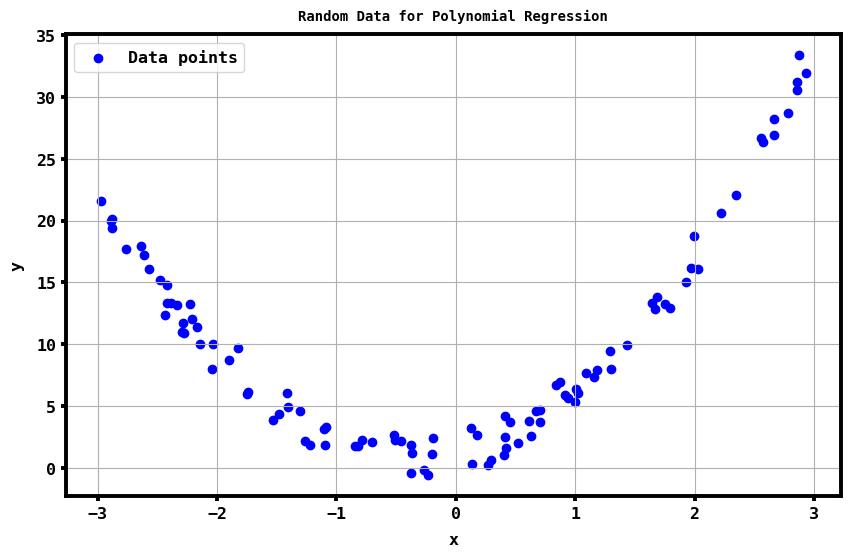

In [53]:
# Let's plot the data to visualize the relationship between x and y.
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Data for Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Now, lets construct the matrix A and the vector b for the linear polynomial regression problem.
# We want to fit a polynomial of the form y = ax^2 + bx + c to the data.
# This is a linear regression problem because the unknowns are the coefficients a, b, and c.
# We can represent the polynomial as a linear equation of the form y = Xw, where:
# X = [[x^2, x, 1]]
# w = [[a], [b], [c]]
# y = [[y]]

# For this problem, we are only going to use the values of x that are less than 0 to fit the polynomial.
x_less_than_0 = x[x < 0]

# Let's define the matrix X and the vector y.  We will use the numpy.c_ function, which concatenates columns.
X = np.c_[x_less_than_0**2, x_less_than_0, np.ones(x_less_than_0.shape)]
y_x_less_than_0 = y[x < 0]

# Now, we can solve the linear regression problem using the least squares method we discussed earlier.
w, residuals, rank, s = np.linalg.lstsq(X, y_x_less_than_0, rcond=None)

# The solution w represents the coefficients a, b, and c that minimize the sum of the squared residuals.
a2, b2, c2 = w

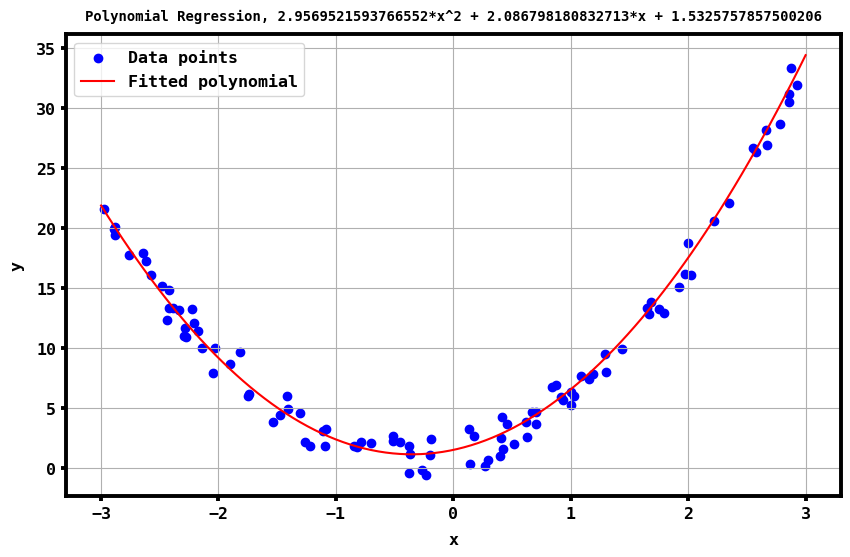

In [58]:
# Now, let's plot the data points and the fitted polynomial.
# Create a vector of x values for the fitted polynomial.
x_fit = np.linspace(-3, 3, 100)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_fit, a2*x_fit**2 + b2*x_fit + c2, color='red', label='Fitted polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Polynomial Regression, {a2}*x^2 + {b2}*x + {c2}')
plt.legend()
plt.grid(True)
plt.show()

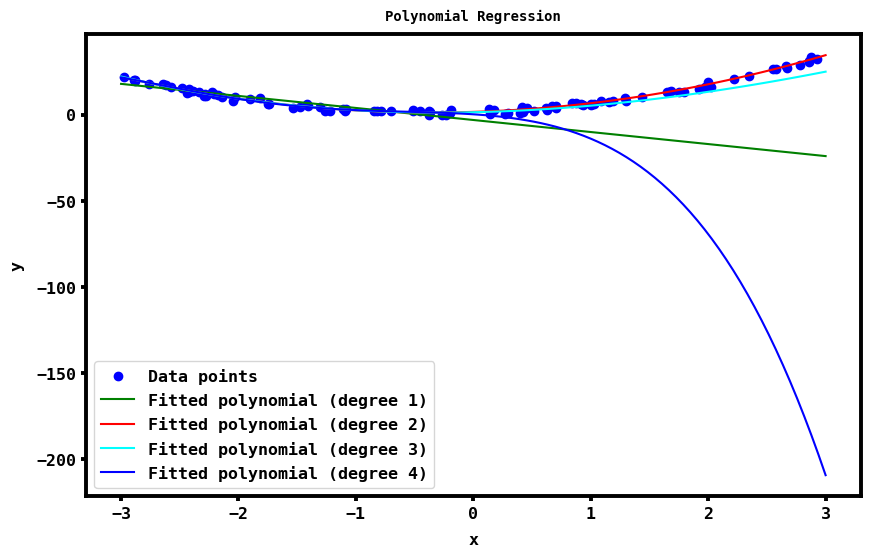

In [59]:
# What if we used a higher order polynomial to fit the data?
# Let's try fitting a polynomial of the form y = ax^4 + bx^3 + cx^2 + dx + e to the data.
# This is still a linear regression problem because the unknowns are the coefficients a, b, c, d, and e.
# We can represent the polynomial as a linear equation of the form y = Xw, where:
# X = [[x^4, x^3, x^2, x, 1]]
# w = [[a], [b], [c], [d], [e]]
# y = [[y]]

# Let's define the matrix X and the vector y for the higher order polynomial regression problem.
X1 = np.c_[x_less_than_0, np.ones(x_less_than_0.shape)]
X3 = np.c_[x_less_than_0**3, x_less_than_0**2, x_less_than_0, np.ones(x_less_than_0.shape)]
X4 = np.c_[x_less_than_0**4, x_less_than_0**3, x_less_than_0**2, x_less_than_0, np.ones(x_less_than_0.shape)]

# Now, we can solve the linear regression problem using the least squares method we discussed earlier.
w1, residuals, rank, s = np.linalg.lstsq(X1, y_x_less_than_0, rcond=None)
w3, residuals, rank, s = np.linalg.lstsq(X3, y_x_less_than_0, rcond=None)
w4, residuals, rank, s = np.linalg.lstsq(X4, y_x_less_than_0, rcond=None)

# The solution w represents the coefficients a, b, c, d, and e that minimize the sum of the squared residuals.
a1, b1 = w1
a3, b3, c3, d3 = w3
a4, b4, c4, d4, e4 = w4

# Now, let's plot the data points and the fitted polynomial along with the first example.

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_fit, a1*x_fit + b1, color='green', label='Fitted polynomial (degree 1)')
plt.plot(x_fit, a2*x_fit**2 + b2*x_fit + c2, color='red', label='Fitted polynomial (degree 2)')
plt.plot(x_fit, a3*x_fit**3 + b3*x_fit**2 + c3*x_fit**1 + d3, color='cyan', label='Fitted polynomial (degree 3)')
plt.plot(x_fit, a4*x_fit**4 + b4*x_fit**3 + c4*x_fit**2 + d4*x_fit + e4, color='blue', label='Fitted polynomial (degree 4)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
